# Part 1

The below calculations of Entropy and Gini Impurity will work only for the binary classification features. Modifications can be made to work for multi class features or continuous variables depending on the requirements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree.export import export_text

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [2]:
toyData = pd.read_csv('toyData.csv')
toyData

,Variable A,Variable B,Variable C,Output
0,Yes,On,High,Red
1,No,Off,Low,Blue
2,Yes,On,High,Red
3,Yes,Off,High,Red
4,No,On,High,Blue
5,Yes,On,Low,Blue
6,No,Off,High,Blue
7,No,On,High,Blue
8,Yes,On,Low,Blue
9,Yes,Off,High,Red


In [3]:
X = toyData.iloc[:, :-1]
y = toyData['Output']

In [4]:
# Works only for binary classification
def calcEntropy(y):
    N = len(y) # No of target observations
    val = y.unique()[0] # Taking only one class into consideration
    s1 = (y == val).sum() # Counts of that class 
    if 0 == s1 or N == s1: # Checking whether there is only one class present
        return 0
    
    # Calculate the probabilities
    p1 = float(s1) / N
    p0 = 1 - p1 
    
    # Returns the entropy
    return -p0*np.log2(p0) - p1*np.log2(p1)

In [5]:
# Works only for binary classification
def calcGini(y):
    N = len(y) # No of target observations
    val = y.unique()[0] # Taking only one class intro consideration
    s1 = (y == val).sum() # Counts of that class
    if 0 == s1 or N == s1: # Checking whether there is only one class is present
        return 0
    p1 = float(s1) / N
    p0 = 1 - p1
    return 1 - p1*p1 - p0*p0

In [6]:
# Works only for categorical variables
def weighted_sum(clf, data, target):
    
    if clf == calcEntropy:
        print("Initial Entropy:", round(calcEntropy(data[target]), 4))
    
    for col in data.iloc[:, :-1].columns:
        lst1 = [] # To store the Gini Impurity or Entropy of the current col feature
        P = [] # To store the conditional probabilities of the current col feature
        current = data[col] # Takes only the current column
        unique = set(data[col]) # Identifies the unique values of that column
        print(col)
        for val in unique:
            x = (data[col] == val).sum()/len(data[col]) # Conditional probability for 'val' in that column
            P.append(x)
            currentdf = data[data[col] == val] # Taking rows of 'val' in the column
            print(val, ":", round(clf(currentdf[target]), 4))
            lst1.append(clf(currentdf[target])) # Calculate and add the entropy/gini value to the list
        print("Weighted Sum:", round(P[0] * lst1[0] + P[1] * lst1[1], 4))
        
        # Calculate the Information Gain only for the Entropy
        if clf == calcEntropy:
            print("Information Gain:", round(calcEntropy(data[target]) - (P[0] * lst1[0] + P[1] * lst1[1]), 4))

## Gini Impurity

In [7]:
weighted_sum(calcGini, toyData, 'Output')

Variable A
No : 0
Yes : 0.4444
Weighted Sum: 0.2667
Variable B
On : 0.4444
Off : 0.5
Weighted Sum: 0.4667
Variable C
High : 0.4898
Low : 0
Weighted Sum: 0.3429


## Entropy

In [8]:
weighted_sum(calcEntropy, toyData, 'Output')

Initial Entropy: 0.971
Variable A
No : 0
Yes : 0.9183
Weighted Sum: 0.551
Information Gain: 0.42
Variable B
On : 0.9183
Off : 1.0
Weighted Sum: 0.951
Information Gain: 0.02
Variable C
High : 0.9852
Low : 0
Weighted Sum: 0.6897
Information Gain: 0.2813


# Part 2

In [9]:
X = datasets.load_boston().data
y = datasets.load_boston().target

In [10]:
X = pd.DataFrame(X, columns = datasets.load_boston().feature_names)
y = pd.DataFrame(y, columns = ['medv'])

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 5.

In [12]:
y['highPriced'] = y.medv.apply(lambda x : 1 if x > 35.0 else 0)

In [13]:
y.head()

,medv,highPriced
0,24.0,0
1,21.6,0
2,34.7,0
3,33.4,0
4,36.2,1


In [14]:
y.describe()

,medv,highPriced
count,506.000000,506.000000
mean,22.532806,0.094862
std,9.197104,0.293314
min,5.000000,0.000000
25%,17.025000,0.000000
50%,21.200000,0.000000
75%,25.000000,0.000000
max,50.000000,1.000000


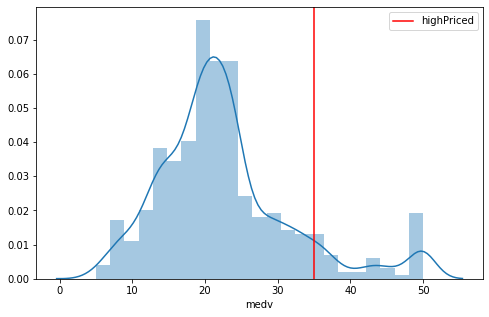

In [15]:
plt.figure(figsize = (8,5))
sns.distplot(y['medv'])
plt.axvline(35, 0, 50, label = 'highPriced', color = 'red')
plt.legend()

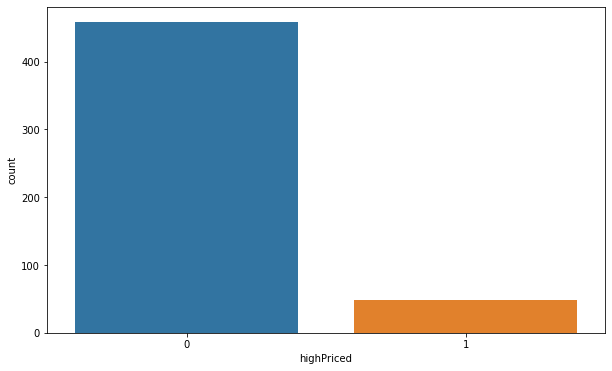

In [16]:
plt.figure(figsize = (10, 6))
g = sns.countplot(x = 'highPriced', data = y)

In [17]:
y.groupby('highPriced').size().reset_index(name = 'Counts')

,highPriced,Counts
0,0,458
1,1,48


Exploring the target variable median house value, we could see that the average and median housing rate is around 20k. Creating a high priced variable where the housing rates are greater than 35k are very less and create a class imbalance. The train and test sets should be split in a way that there are enough samples in both the classes in the training set to predict them better.

## 6.

In [15]:
def information_gain(clf, x, y, split):
    y0 = y[x < split] # Take y values where x is less than the split
    y1 = y[x >= split] # Take y values where x is greater than or equal to split
    N = len(y)
    y0len = len(y0)
    if y0len == 0 or y0len == N: # If y has only one class present return 0
        return 0
    # Calculate the probabilities and information gain
    p0 = float(y0len) / N
    p1 = 1 - p0
    return clf(y) - p0*clf(y0) - p1*clf(y1)

In [16]:
def gini_impurity(clf, x, y, split):
    y0 = y[x < split] # Take y values where x is less than the split
    y1 = y[x >= split] # Take y values where x is greater than or equal to split
    N = len(y)
    y0len = len(y0)
    if y0len == 0 or y0len == N: # If y has only one class present return 0
        return 0
    # Calculate the probabilities and Gini Impurity
    p0 = float(y0len) / N
    p1 = 1 - p0
    return p0 * clf(y0) + p1 * clf(y1)

In [17]:
def find_split(clf, X, y, col):
    # Sorting and then finding the split 
    x_values = X[col] # 'col' series
    sort_idx = np.argsort(x_values) # sorting the xvalues and getting their respective indices
    #print(sort_idx)
    x_values = x_values.iloc[sort_idx] # Sorting the xvalues
    y_values = y.iloc[sort_idx] # Taking y_values w.r.t x_values 
    
    # Take the indices where there is a transition between either 0 to 1 or 1 to 0
    boundaries = np.nonzero(y_values.values[:-1] != y_values.values[1:])[0]
    
    if clf == calcEntropy:
        best_split = None
        ig_max = 0

        for i in boundaries:
            # Calculate the mean where the transition happens
            split = (x_values.values[i] + x_values.values[i+1]) / 2
            # Calculating the information gain at each splitting point
            ig = information_gain(clf, x_values, y_values, split) 
            if ig > ig_max:
                ig_max = ig
                best_split = split
            #print(ig_max, best_split)
            
        return ig_max, best_split # Getting the maximum information gain and where the split happens
    else:
        best_split = None
        gini_min = 1
        
        for i in boundaries:
            # Calculate the mean where the transition happens
            split = (x_values.values[i] + x_values.values[i+1]) / 2
            gini = gini_impurity(clf, x_values, y_values, split) # Calculating the gini impurity
            if gini < gini_min:
                gini_min = gini
                best_split = split
            #print(gini_min, best_split)
                
        return gini_min, best_split # Getting the minimum gini impurity and where the split happens

In [18]:
print("Entropy:", find_split(calcEntropy, X, y['highPriced'], 'AGE'))
print("Gini Impurity:", find_split(calcGini, X, y['highPriced'], 'AGE'))

Entropy: (0.005665367307344349, 37.25)
Gini Impurity: (0.17022819758951685, 37.25)


For the Age variable, the optimal split using the entropy and the Gini impurity are same. But considering the gain, Age variable might not be the best variable to take as the root node of the tree. Let us try with the CRIM variable.

In [19]:
print("Entropy:", find_split(calcEntropy, X, y['highPriced'], 'CRIM'))
print("Gini Impurity:", find_split(calcGini, X, y['highPriced'], 'CRIM'))

Entropy: (0.019515611584427217, 9.280695000000001)
Gini Impurity: (0.1682623334797249, 0.02182)


In the case of CRIM variable, we are getting two different split points while using Entropy and Gini Impurity. Again not a great variable to start your tree with. 

## 7.

In [20]:
d = DecisionTreeClassifier(criterion = 'entropy')

In [21]:
d.fit(X[['AGE']], y[['highPriced']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
print("Optimal split with AGE variable:", export_text(d)[0:24])

Optimal split with AGE variable: |--- feature_0 <= 37.25



The find_split method have identified the same splitting point as the DecisionTreeClassifier() at 37.25 for the AGE variable.

## 8.

In [23]:
# Lists to store the depth, column name, and their threshold
level = []
columns = []
threshold = []
side = []

def build_tree(clf, X, y, depth = 1, max_depth = None):
    
    if clf == calcEntropy:
    
        if len(y) == 1 or len(set(y)) == 1:
            print("Only one class is present: No further splits")
        
        else:
    
            cols = list(X)
    
            ig_max = 0
            best_column = None
            best_split = None
            
            # Identify the best candidate for the split
            for col in cols:
                ig, split = find_split(clf, X, y, col)
                #print(col, ig, split)
                if ig > ig_max:
                    ig_max = ig
                    best_column = col
                    best_split = split
    
            print("Best column:", best_column)
            print("Best Split:", best_split)
    
            if ig_max == 0:
                print("No further splits")
                pred = np.round(y.mean())
        
            else:
                #print(best_column, best_split)
                
                if depth <= max_depth:
                    
                    # Finds the left side nodes of the tree
                    left_index = X[X[best_column] < best_split].index
                    #print("Left:", len(left_index))
                    Xleft = X.loc[left_index]
                    yleft = y.loc[left_index]
                    print("Depth:", depth)
                    level.append(depth)
                    columns.append(best_column)
                    threshold.append(best_split)
                    side.append("Left")
                    print("Side:", side[-1])
                    build_tree(clf, Xleft, yleft, 1 + depth, max_depth)
                    
                    # Finds the right side nodes of the tree
                    right_index = X[X[best_column] >= best_split].index
                    #print("Right:", len(right_index))
                    Xright = X.loc[right_index]
                    yright = y.loc[right_index]
                    print("Depth:", depth)
                    level.append(depth)
                    columns.append(best_column)
                    threshold.append(best_split)
                    side.append("Right")
                    print("Side:", side[-1])
                    build_tree(clf, Xright, yright, 1 + depth, max_depth)
                    

                    # To identify the splits using the Gini impurity
                    
#     else:
        
#         if len(y) == 1 or len(set(y)) == 1:
            
#             print("Only one class is present: No further splits")
        
#         else:
    
#             cols = list(X)
    
#             gini_min = 1
#             best_column = None
#             best_split = None
    
#             for col in cols:
#                 gini, split = find_split(clf, X, y, col)
#                 #print(col, gini, split)
#                 if gini < gini_min:
#                     gini_min = gini
#                     best_column = col
#                     best_split = split
    
#             print("Best column:", best_column)
#             print("Best Split:", best_split)
    
#             if gini_min == 1:
#                 print("No further splits")
        
#             else:
#                 #print(best_column, best_split)
                
#                 if depth <= max_depth:
                
#                     left_index = X[X[best_column] < best_split].index
#                     print("Left:", len(left_index))
#                     Xleft = X.loc[left_index]
#                     yleft = y.loc[left_index]
#                     print("Depth:", depth)
#                     level.append(depth)
#                     columns.append(best_column)
#                     threshold.append(best_split)
#                     side.append("Left")
#                     print("Side:", side[-1])
#                     build_tree(clf, Xleft, yleft, 1 + depth, max_depth)
    
#                     right_index = X[X[best_column] >= best_split].index
#                     print("Right:", len(right_index))
#                     Xright = X.loc[right_index]
#                     yright = y.loc[right_index]
#                     print("Depth:", depth)
#                     level.append(depth)
#                     columns.append(best_column)
#                     threshold.append(best_split)
#                     side.append("Right")
#                     print("Side:", side[-1])
#                     build_tree(clf, Xright, yright, 1 + depth, max_depth)
                    
                

In [24]:
build_tree(calcEntropy, X[['RM', 'LSTAT', 'RAD']], y['highPriced'], max_depth = 3)

Best column: RM
Best Split: 6.941
Depth: 1
Side: Left
Best column: LSTAT
Best Split: 9.535
Depth: 2
Side: Left
Best column: RAD
Best Split: 24.0
Depth: 3
Side: Left
Best column: LSTAT
Best Split: 9.44
Depth: 3
Side: Right
Best column: LSTAT
Best Split: 5.425
Depth: 2
Side: Right
Only one class is present: No further splits
Depth: 1
Side: Right
Best column: RM
Best Split: 7.436999999999999
Depth: 2
Side: Left
Best column: RAD
Best Split: 2.5
Depth: 3
Side: Left
Only one class is present: No further splits
Depth: 3
Side: Right
Best column: LSTAT
Best Split: 8.844999999999999
Depth: 2
Side: Right
Best column: RM
Best Split: 8.7525
Depth: 3
Side: Left
Only one class is present: No further splits
Depth: 3
Side: Right
Only one class is present: No further splits


In [25]:
splits_df = pd.DataFrame(np.column_stack((
    level, side, columns, threshold)), columns= ['Level', 'Side', 'Variable', 'Threshold'])

In [26]:
splits_df

,Level,Side,Variable,Threshold
0,1,Left,RM,6.941
1,2,Left,LSTAT,9.535
2,3,Left,RAD,24.0
3,3,Right,RAD,24.0
4,2,Right,LSTAT,9.535
5,1,Right,RM,6.941
6,2,Left,RM,7.436999999999999
7,3,Left,RAD,2.5
8,3,Right,RAD,2.5
9,2,Right,RM,7.436999999999999


The splits_df has four variables with level indicating the depth starts with 1 which is the root, side has either left or right with left being the condition is false and right being the condition is right. The threshold indicates the split point. 

In [27]:
splits_df.sort_values(['Level', 'Side'])

,Level,Side,Variable,Threshold
0,1,Left,RM,6.941
5,1,Right,RM,6.941
1,2,Left,LSTAT,9.535
6,2,Left,RM,7.436999999999999
4,2,Right,LSTAT,9.535
9,2,Right,RM,7.436999999999999
2,3,Left,RAD,24.0
7,3,Left,RAD,2.5
10,3,Left,RM,8.7525
3,3,Right,RAD,24.0


In [28]:
build_tree(calcEntropy, X[['RM', 'LSTAT']], y['highPriced'], max_depth = 2)

Best column: RM
Best Split: 6.941
Depth: 1
Side: Left
Best column: LSTAT
Best Split: 9.535
Depth: 2
Side: Left
Best column: LSTAT
Best Split: 9.524999999999999
Depth: 2
Side: Right
Only one class is present: No further splits
Depth: 1
Side: Right
Best column: RM
Best Split: 7.436999999999999
Depth: 2
Side: Left
Best column: LSTAT
Best Split: 5.359999999999999
Depth: 2
Side: Right
Best column: RM
Best Split: 8.7525


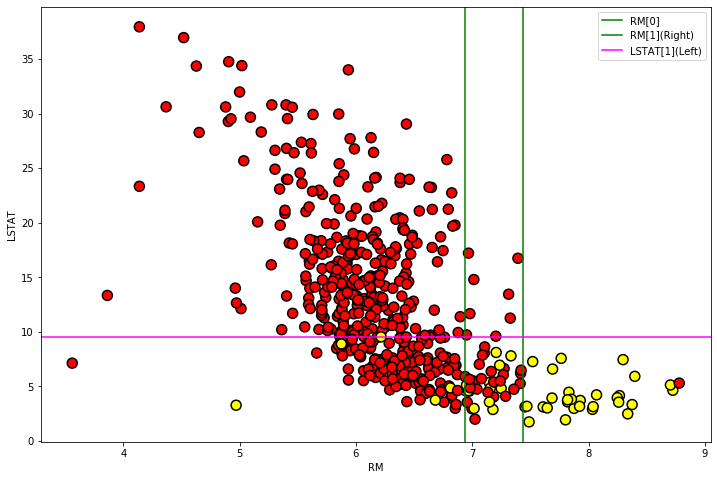

In [286]:
#xx, yy = get_grid(X[['RM', 'LSTAT']].to_numpy())
#target = y[['highPriced']].to_numpy()
#plt.pcolormesh(xx, yy, target, cmap = 'autumn')
plt.figure(figsize = (12, 8))
plt.scatter(X[['RM']].values, X[['LSTAT']].values, c= y[['highPriced']].to_numpy(), s = 100,
           cmap = 'autumn', edgecolors = 'black', linewidth = 1.5)
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.axvline(6.941, 0, 9, label='RM[0]', color = 'green')
plt.axvline(7.44, 0, 9, label='RM[1](Right)', color = 'green')
#plt.axvline(8.75, 0, 9, label='RM[2]', color = 'green')
plt.axhline(9.535, 0, 40, label='LSTAT[1](Left)', color = 'magenta')
#plt.axhline(5.36, 0, 40, label='LSTAT[1]', color = 'magenta')
plt.legend()

In the above image, the red dots shows that the houses that are not high priced while the yellow dots represents the houses that are overpriced. From the initial look at the image we could see that the lot of houses that are overpriced have room counts greater than 7 at least. The Tree model identifies the ideal split at 6.941 which roughly translates to 7. After the first split, if the condition fails, the LSTAT variable splits at the point of 9.53. The lower status of the population variable doesn't necessarily improve the prediction as we could see there are a lot of low priced houses and some outliers when the LSTAT variable is less than 9.53. While when number of rooms is greater 7 but less than ~7.5 there are some mixes of high priced and low priced houses with low priced houses dominating and thus they would predict low priced houses but the leaf node is not that pure. But if the room count is greater than ~7.5, there are a lot of houses that are highPriced and the tree will predict them as high priced.

## Part 3

### 10.

In [29]:
# Taking the multiples of five's as indices
N = len(X)
index_5 = []
for i in range(0, N, 5):
    index_5.append(i)
    
print(index_5)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505]


In [30]:
# Creating the test and train data set
X_train, X_test, y_train, y_test = (X.drop(index_5).reset_index(), X.iloc[index_5].reset_index(),
                                    y.drop(index_5).reset_index(), y.iloc[index_5].reset_index())

In [31]:
y_train.groupby('highPriced').size().div(len(y_train))

highPriced
0    0.898515
1    0.101485
dtype: float64

In [32]:
y_test.groupby('highPriced').size().div(len(y_test))

highPriced
0    0.931373
1    0.068627
dtype: float64

In [34]:
X_train.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
1,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
2,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
3,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
4,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


The training data has got ten percent of high priced houses of the entire trained data and the test data has got 7 percent of the entire test data. The split between the test and train data are not exactly optimal but then we have got enough data in the training set so that the model can predict correctly in the test dataset.

### 11.

In [35]:
# Randomly generated predictions from the training data
pred = y_train['highPriced'].sample(n = len(y_test), random_state = 42)

In [36]:
confusion_matrix(y_test['highPriced'], pred)

array([[83, 12],
       [ 6,  1]], dtype=int64)

In [37]:
print("Accuracy:", round(accuracy_score(y_test['highPriced'], pred), 3))
print("Recall:", round(recall_score(y_test['highPriced'], pred), 3))
print("Precision:", round(precision_score(y_test['highPriced'], pred), 3))

Accuracy: 0.824
Recall: 0.143
Precision: 0.077


Though the predictions has a good accuracy score of 82% the precision and recall score are not that great. If this is a output of the model then we could say that the model cannot predict the high priced houses and the distribution of data betweeen the training and test set is not proper and thus, we have to redistribute in a proper way so that the model can see enough observations in both the classes.

### 12.

In [38]:
class DecisionTree():
    
    def __init__(self, depth = 1, max_depth = None):
        self.depth = depth
        self.max_depth = max_depth
        
    def build_tree(self, clf, X, y):
    
        if clf == calcEntropy:
    
            if len(y) == 1 or len(set(y)) == 1:
                print("Only one class is present: No further splits")
                self.left = None
                self.right = None
                self.col = None
                self.split = None
                self.pred = y.iloc[0]
                self.prob = 1
                print("Pred:", self.pred)
        
            else:
    
                cols = list(X)
    
                ig_max = 0
                best_column = None
                best_split = None
    
                for col in cols:
                    ig, split = find_split(clf, X, y, col)
                    #print(col, ig, split)
                    if ig > ig_max:
                        ig_max = ig
                        best_column = col
                        best_split = split
                #print("Depth:", self.depth)
                print("Best column:", best_column)
                print("Best Split:", best_split)
                self.col = best_column
                self.split = best_split
    
                if ig_max == 0:
                    print("No further splits")
                    self.pred = round(y.mean())
                    self.prob = y.mean()
                    print("Pred:", self.pred)
        
                else:
                    #print(best_column, best_split)
                    
                    if self.depth == self.max_depth:
                        self.left = None
                        self.right = None
                        self.pred = [
                            round(y[X[best_column] < best_split].mean()),
                            round(y[X[best_column] >= best_split].mean())
                        ]
                        self.prob = [
                            y[X[best_column] < best_split].mean(),
                            y[X[best_column] >= best_split].mean()
                        ]
                        print("Pred:", self.pred)
                
                    else:
                
                        left_index = X[X[best_column] < best_split].index
                        #print("Left:", len(left_index))
                        Xleft = X.loc[left_index]
                        yleft = y.loc[left_index]
                        print("Depth:", self.depth+1)
                        self.left = DecisionTree(1 + self.depth, self.max_depth)
                        print("Left")
                        self.left.build_tree(clf, Xleft, yleft)
                        
    
                        right_index = X[X[best_column] >= best_split].index
                        #print("Right:", len(right_index))
                        Xright = X.loc[right_index]
                        yright = y.loc[right_index]
                        print("Depth:", self.depth+1)
                        self.right = DecisionTree(1 + self.depth, self.max_depth)
                        print("Right")
                        self.right.build_tree(clf, Xright, yright)
                        
                        
                    
    # Identify the predictions for each observation                   
    def predict_values(self, x):
        
        # Traverses from the root node 
        if self.col is not None and self.split is not None:
            values = x[self.col]
            if values < self.split:
                if self.left:
                    v = self.left.predict_values(x)
                else:
                    v = self.pred[0]
            else:
                if self.right:
                    v = self.right.predict_values(x)
                else:
                    v = self.pred[1]
                    
        else:
            # Shows that it has only one prediction
            v = self.pred
        
        return v
    
    def predict_proba(self, x):
        
        if self.col is not None and self.split is not None:
            values = x[self.col]
            if values < self.split:
                if self.left:
                    v = self.left.predict_proba(x)
                else:
                    v = self.prob[0]
            else:
                if self.right:
                    v = self.right.predict_proba(x)
                else:
                    v = self.prob[1]
                    
        else:
            v = self.prob
            
        return v
    # Predicts the output for every observation and returns an array of predictions
    def predict(self, X):
        N = len(X)
        P = np.zeros(N)
        for i in range(N):
            P[i] = self.predict_values(X.iloc[i])
        return P
    
    def predict_prob(self, X):
        N = len(X)
        Prob = np.zeros((N, 2))
        for i in range(N):
            Prob[i][0] = self.predict_proba(X.iloc[i])
            Prob[i][1] = 1 - Prob[i][0]
        return Prob

The above decision tree model is written based on the course provided by LazyProgrammer on Udemy. The link to the course is: https://www.udemy.com/course/data-science-supervised-machine-learning-in-python/

In [39]:
t = DecisionTree(max_depth = 2)

In [40]:
t.build_tree(calcEntropy, X_train[['RM', 'LSTAT']], y_train['highPriced'])

Best column: RM
Best Split: 7.127000000000001
Depth: 2
Left
Best column: LSTAT
Best Split: 5.115
Pred: [0, 0]
Depth: 2
Right
Best column: RM
Best Split: 7.436999999999999
Pred: [0, 1]


In [44]:
prediction = t.predict(X_test[['RM', 'LSTAT']])

In [45]:
confusion_matrix(y_test['highPriced'], prediction)

array([[95,  0],
       [ 3,  4]], dtype=int64)

In [46]:
print("Accuracy:", round(accuracy_score(y_test['highPriced'], prediction), 3))
print("Recall:", round(recall_score(y_test['highPriced'], prediction), 3))
print("Precision:", round(precision_score(y_test['highPriced'], prediction), 3))

Accuracy: 0.971
Recall: 0.571
Precision: 1.0


This model performs obviously better than the randomly generated samples from the training data as we could see the precision and recall score has improved significantly better and so is the accuracy score. Due to the better distribution of the data, the model was able to classify between the high priced and not high priced houses and get right 97% of the time. Let us see how the model performs with sklearn classifiers.

### 13. Decision Tree Classifier - Sklearn

In [47]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
dtree.fit(X_train[['RM', 'LSTAT']], y_train['highPriced'])
predict_tree = dtree.predict(X_test[['RM', 'LSTAT']])

In [48]:
confusion_matrix(predict_tree, y_test['highPriced'])

array([[95,  3],
       [ 0,  4]], dtype=int64)

In [49]:
print("Accuracy:", round(accuracy_score(y_test['highPriced'], predict_tree), 3))
print("Recall:", round(recall_score(y_test['highPriced'], predict_tree), 3))
print("Precision:", round(precision_score(y_test['highPriced'], predict_tree), 3))

Accuracy: 0.971
Recall: 0.571
Precision: 1.0


In [50]:
dtree.predict(X_test[['RM', 'LSTAT']])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
dtree.predict(X_test[['RM', 'LSTAT']]) == t.predict(X_test[['RM', 'LSTAT']])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [52]:
(t.predict_prob(X_test[['RM', 'LSTAT']])[:, 0] != dtree.predict_proba(X_test[['RM', 'LSTAT']])[:, 1]).sum()

0

In [54]:
t.build_tree(calcEntropy, X_train[['RM', 'LSTAT']], y_train['highPriced'])

Best column: RM
Best Split: 7.127000000000001
Depth: 2
Left
Best column: LSTAT
Best Split: 5.115
Pred: [0, 0]
Depth: 2
Right
Best column: RM
Best Split: 7.436999999999999
Pred: [0, 1]


In [53]:
export_text(dtree)

'|--- feature_0 <= 7.13\n|   |--- feature_1 <= 5.12\n|   |   |--- class: 0\n|   |--- feature_1 >  5.12\n|   |   |--- class: 0\n|--- feature_0 >  7.13\n|   |--- feature_0 <= 7.44\n|   |   |--- class: 0\n|   |--- feature_0 >  7.44\n|   |   |--- class: 1\n'

We could see that the Decision Tree classifier has the same level of predictions on comparison with the classifier we built and we could see that the probabilities and the predictions are as same as the model we built.

The decision tree classifier of the sklearn library was able to predict all the not high priced houses perfectly while it was not able to predict the high priced houses. Though it has high precision, it has a very low recall. With more samples on the high priced houses, the model might be able to predict them properly with high precision.

### 14. Bagging Classifier

In [55]:
bagging = BaggingClassifier()
bagging.fit(X_train[['RM', 'LSTAT']], y_train['highPriced'])
predict_bag = bagging.predict(X_test[['RM', 'LSTAT']])

In [56]:
confusion_matrix(predict_bag, y_test['highPriced'])

array([[92,  2],
       [ 3,  5]], dtype=int64)

In [57]:
print("Accuracy:", round(accuracy_score(y_test['highPriced'], predict_bag), 3))
print("Recall:", round(recall_score(y_test['highPriced'], predict_bag), 3))
print("Precision:", round(precision_score(y_test['highPriced'], predict_bag), 3))

Accuracy: 0.951
Recall: 0.714
Precision: 0.625


The bagging classifier tries to increase the weight of the high priced houses to predict them properly but in the process it predicted not high priced houses wrongly. The bagging classifier tries to increase the recall but in the process decreased the precision.

### 15. Random Forest Classifier

In [75]:
rand_forest = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rand_forest.fit(X_train[['RM', 'LSTAT']], y_train['highPriced'])
predict_rand_forest = rand_forest.predict(X_test[['RM', 'LSTAT']])

C:\Users\Gana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [76]:
confusion_matrix(predict_rand_forest, y_test['highPriced'])

array([[95,  2],
       [ 0,  5]], dtype=int64)

In [77]:
print("Accuracy:", round(accuracy_score(y_test['highPriced'], predict_rand_forest), 3))
print("Recall:", round(recall_score(y_test['highPriced'], predict_rand_forest), 3))
print("Precision:", round(precision_score(y_test['highPriced'], predict_rand_forest), 3))

Accuracy: 0.98
Recall: 0.714
Precision: 1.0


The Random Forest classifier, an extension of the bagging trees model, actually does a pretty good job at classifying the high priced and low priced houses with an accuracy score of 98% and a precision score of perfect 100% and recall score of ~71%. The model actually handles the class imbalance really better and gives the best performance among all the models that have been considered. 